In [2]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.patches as patches

In [21]:
nojit = np.load('./time_nojit.npz', allow_pickle=True)['time']
njit = np.load('./time_njit.npz', allow_pickle=True)['time']
core_analysis1 = np.load('./time-core-analysis1.npz', allow_pickle=True)['runtime']
core_analysis2 = np.load('./time-core-analysis2.npz', allow_pickle=True)['runtime']

cores1 = np.load('./time-core-analysis1.npz', allow_pickle=True)['cores']
cores2 = np.load('./time-core-analysis2.npz', allow_pickle=True)['cores']

cores = list(cores1) + list(cores2)

core_analysis = list(core_analysis1.astype(float)) +  list(core_analysis2.astype(float))

speed_core_analysis = (core_analysis[0]/core_analysis).astype(float)
speedup_core = np.around(speed_core_analysis,decimals=1)

jitrun = nojit/np.array([nojit,njit])

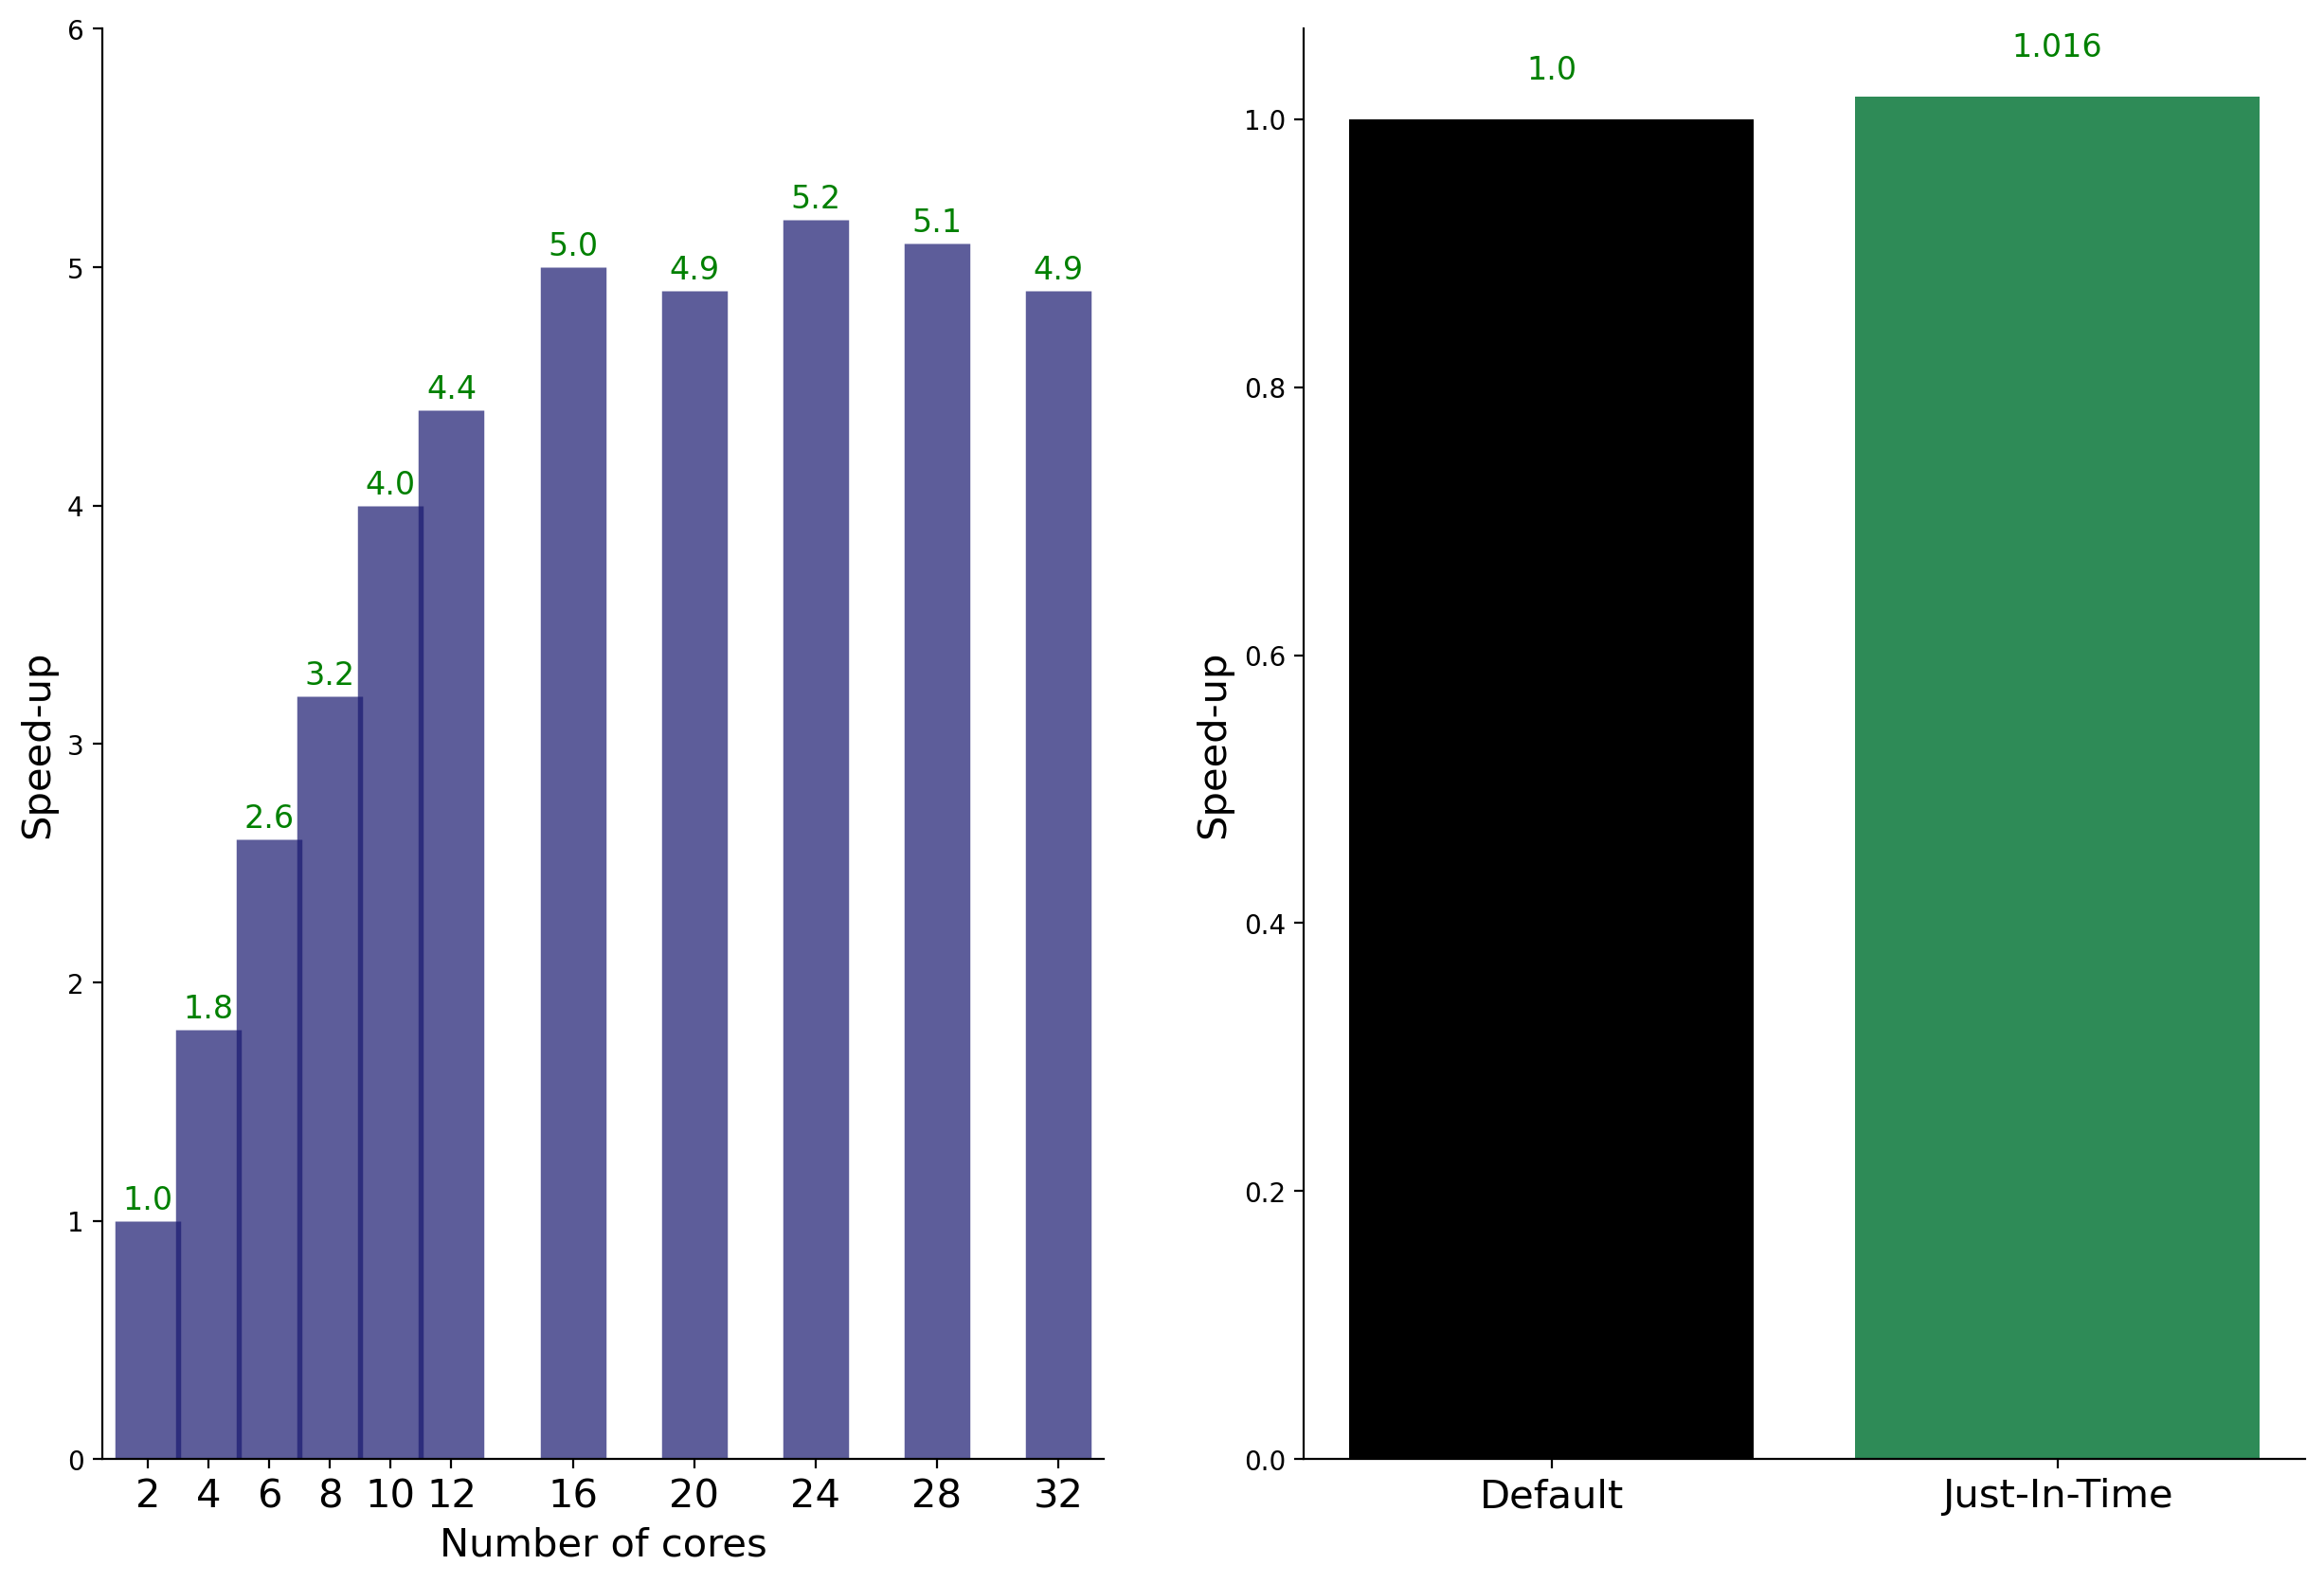

In [25]:
fig = plt.figure(figsize=(15,10), dpi=200)
ax = fig.add_subplot(121)
#ax.set_yscale('log')
ax.vlines(x=cores, ymin=0, ymax=speedup_core, color='midnightblue', alpha=0.7, linewidth=25)
for i, cty in enumerate(speedup_core):
    ax.text(cores[i], cty+0.05, round(cty, 1), horizontalalignment='center', color= 'green',fontsize=12)
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.axes.get_yaxis().set_visible(False)
ax.set_ylabel('Speed-up',fontsize=15)
ax.set_xlabel('Number of cores',fontsize=15)
ax.set_xticks(cores)
ax.set_xticklabels(cores,fontsize=15)
ax.set_ylim([0,6])

xx = np.arange(0,2,1)

ax1 = fig.add_subplot(122)
colors = ['black','seagreen']
for i, cty in enumerate(jitrun):
    ax1.bar(xx[i],jitrun[i],color=colors[i])
    ax1.text(i, cty+0.03, round(cty, 3), horizontalalignment='center', color= 'green',fontsize=12)
    
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
#ax1.spines['bottom'].set_visible(False)
#ax1.spines['left'].set_visible(False)
#ax1.axes.get_yaxis().set_visible(False)
#ax1.set_ylabel('Speed-up')
#ax1.set_xlabel('Number of cores')
ax1.set_ylabel('Speed-up',fontsize=15)
ax1.set_xticks(xx)
ax1.set_xticklabels(['Default','Just-In-Time'],fontsize=15)

plt.savefig('Speedup-cores.pdf', transparent=True)